# Dataset
---
- Used Cars Price in India
- Kaggle (https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data) (train-data.csv)
---
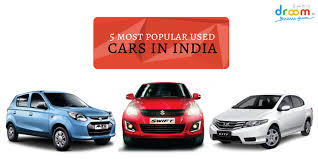

# Introduction
- The automotive industry in India is one of the largest in the world. In recent years, there has been a significant increase in the demand for used cars. This surge has created a need for an efficient and fair system for pricing these vehicles. However, determining an appropriate price for a used car is not straightforward due to various influencing factors such as age, brand, model, kilometers driven, etc. This project aims to address this issue by developing a predictive model that can accurately estimate the price of used cars based on these factors.
---
## Problem Statement: 
- The used car market in India is experiencing rapid growth. With this expansion comes the complex challenge of accurately pricing used cars, a crucial aspect for buyers, sellers, and businesses in this sector. The price of a used car is influenced by a multitude of factors such as the car’s age, brand, model, kilometers driven, and more. The problem I aim to address is the development of a predictive model that can accurately estimate the price of used cars in India based on these various features. The causes of this problem include the lack of a standardized pricing model for used cars and the wide range of factors that influence a car’s price. The effects are potential unfair pricing and difficulty in buying or selling used cars. The scope of this problem extends to anyone involved in the buying or selling of used cars in India.
---
## Objective:
-  The primary objective of this project is to construct a predictive model using linear regression, decision tree regressor, and random forest regressor that can accurately predict the price of a used car given its features. We aim to understand which features are most influential in determining the price of a used car. This could provide valuable insights for sellers when pricing their cars or for buyers looking to understand if a car is priced fairly. Additionally, businesses operating in this space could use these insights to make informed decisions.
- I also aim to compare the performance of three models: linear regression, decision tree regressor, and random forest regressor, and select the one that predicts most accurately.
---
## To overcome potential problems in this project, I will:
- Handle missing values appropriately to ensure my model has the most accurate information.
- Remove unnecessary columns that do not contribute to the prediction.
- Select the best features that have the most impact on the price.
- Add new features if necessary to improve my model’s performance.

In [1]:
# Data modules
import numpy as np
import scipy.stats as stats
import pandas as pd
# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
used_cars = pd.read_csv('used_cars.csv')
used_cars.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
used_cars.shape

(6019, 14)

In [4]:
used_cars.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [5]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
#checking null value
used_cars.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
# check duplicates values
duplicates = used_cars.duplicated()
duplicates.sum()

0

---
# Data Wrangling

My dataset has 14 columns and I noticed having 2 columns would probably interfere and prevent to get a good models which are Unnamed: 0  and New_Price 
1) I need to remove that 2 columns (Unnamed: 0  and New_Price)
2) Replace 'null bhp' values in Power column to NaN
3) Remove missing values in columns (Mileage, Engine, Power and Seats)
4) Data type for columns Mileage, Engine and Power need to be change to float.
5) Convert unit (km/kg to kmpl) in column Mileage.
6) Remove units (kmpl, cc, bhp)
7) Rename column :
    - Mileage to Mileage_in_kmpl
    - Engine to Engine_In_CC
    - Power to Power_In_bhp
    - Price to Price_In_Lakhs
8) Feature Engineering
    - Create new column which is 'Company' by extracting first word from the ‘Name’ column.

## Remove columns

In [8]:
used_cars.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


## Replace 'null bhp' in columns Power to 'NaN'

In [9]:
(used_cars['Power'] == 'null bhp').sum()

107

In [10]:
used_cars['Power'] = used_cars['Power'].replace('null bhp',np.nan)

In [11]:
used_cars.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

## Remove Missing Values

In [12]:
used_cars = used_cars.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'])

In [13]:
used_cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

---
## Remove units (kmpl, cc, bhp) for columns Mileage, Engine and Power and convert to data type float

---
# Mileage
I noticed in this column have 2 units which are km/kg and kmpl
1) To count number of rows have units 'km/kg' and 'kmpl'
2) Convert units 'km/kg' to 'kmpl'
    - kmpl is kilometers per litre fuel for petrol and diesel cars
    - km/kg is kilometers per kilogram fuel for CNG vehicles
    - 1 kg of CNG = 1.689 litres (source: https://www.gov.uk/hmrc-internal-manuals/gas-for-road-fuel-use/hcogas400350)
    - km/kg need multiply with 1.689 to convert in kmpl
3) Remove 'kmpl'
---

To count number of rows have units 'km/kg' and 'kmpl'

In [14]:
kmkg = 0
kmpl = 0
for i in used_cars.Mileage:
    if str(i).endswith("km/kg"):
        kmkg = kmkg + 1
    elif str(i).endswith("kmpl"):
        kmpl = kmpl + 1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 65 
The number of rows with kmpl : 5807 


---
Convert units 'km/kg' to 'kmpl'

In [15]:
# Define a conversion factor
conversion_factor = 1.689  

# Apply the conversion to rows where 'Mileage' contains 'km/kg'
mask = used_cars['Mileage'].str.contains('km/kg')
used_cars.loc[mask, 'Mileage'] = (used_cars.loc[mask, 'Mileage'].str.split(' ',expand=True)[0].astype(float) * conversion_factor).apply(lambda x: '{:.2f}'.format(x)) + ' kmpl'
used_cars.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93 kmpl,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


---
Remove 'kmpl'

In [16]:
used_cars['Mileage'] = used_cars['Mileage'].str.replace(' kmpl', '')
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74


---
# Engine
1) remove CC

In [17]:
used_cars['Engine'] = used_cars['Engine'].str.replace('CC', '')
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.0,17.74


---
# Power
1) remove bhp

In [18]:
used_cars['Power'] = used_cars['Power'].str.replace('bhp', '')
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


---
## Data type for columns Mileage, Engine and Power need to be change to float.

In [19]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 596.4+ KB


In [20]:
used_cars['Mileage'] = used_cars['Mileage'].str.split(expand=True)[0].astype(float)
used_cars['Engine'] = used_cars['Engine'].str.split(expand=True)[0].astype(float)
used_cars['Power'] = used_cars['Power'].str.split(expand=True)[0].astype(float)

In [21]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


---
## Rename column : 
1) Mileage to Mileage_in_kmpl
2) Engine to Engine_In_CC
3) Power to Power_In_bhp
1) Price to Price_In_Lakhs

In [22]:
# Define a dictionary with old column names as keys and new column names as values
new_column_names = {
    'Mileage': 'Mileage_in_kmpl',
    'Engine': 'Engine_In_CC',
    'Power': 'Power_In_bhp',
    'Price': 'Price_In_Lakhs'
}

# Rename the columns
used_cars = used_cars.rename(columns=new_column_names)
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


---
# Feature Engineering
    - Create new column which is 'Company' by extracting first word from the ‘Name’ column.

In [23]:
used_cars['Company'] = used_cars['Name'].apply(lambda x: x.split(' ')[0])
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,44.93,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


---
# Exploratory Data Analysis

---
Descriptive statistic of used_cars dataset for numeric columns

In [24]:
used_cars.describe()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.465615,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,5.036589,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.290000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.330000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,56.650000,5998.000000,560.000000,10.000000,160.000000


- The columns have outliers are Kilometers_Driven, Mileage_in_kmpl, Engine_In_CC, Power_In_bhp and seats.
- Columns Mileage_in_kmpl shows have zeros values in some rows
---

---
Descriptive statistic of used_cars dataset for object  columns

In [25]:
used_cars.describe(include=['object'])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Company
count,5872,5872,5872,5872,5872,5872
unique,1811,11,4,2,4,30
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,Maruti
freq,49,775,3152,4170,4839,1175


### Boxplot and Histogram for numeric columns

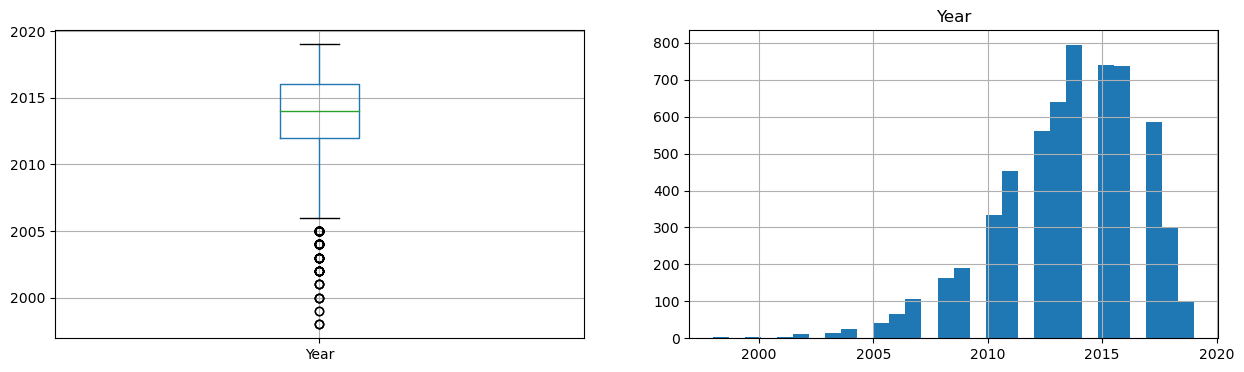

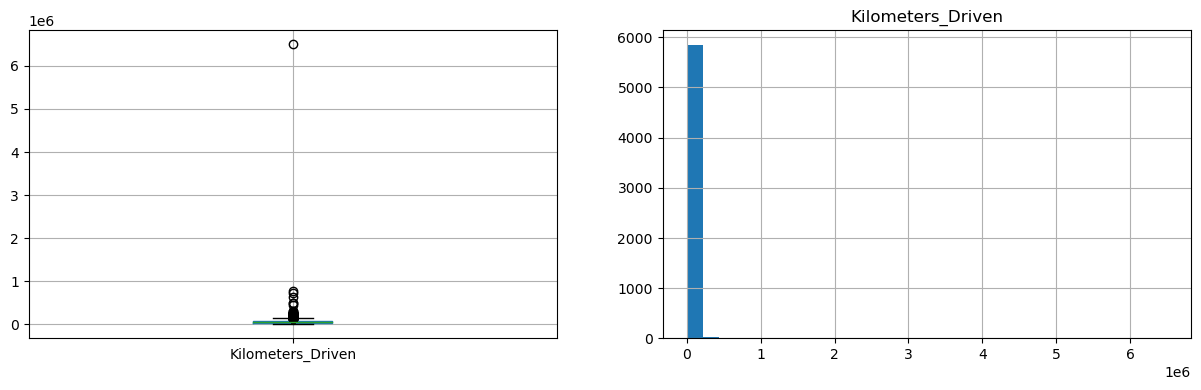

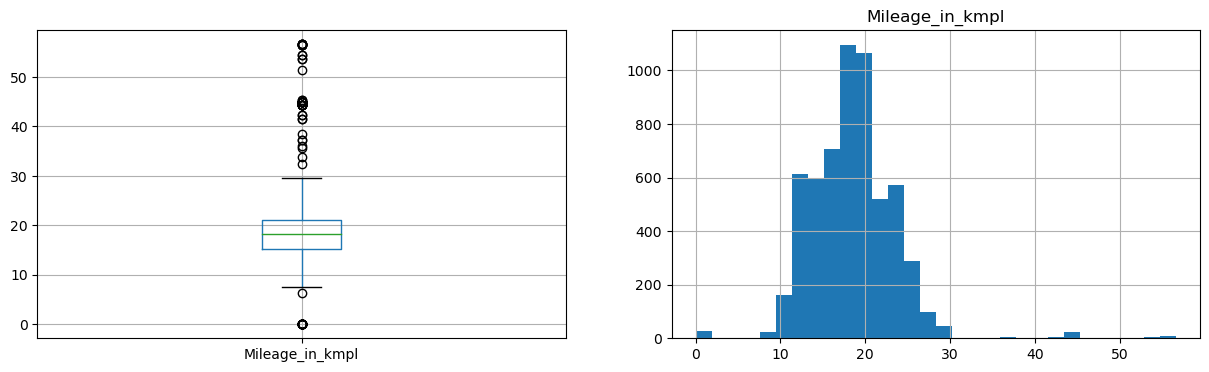

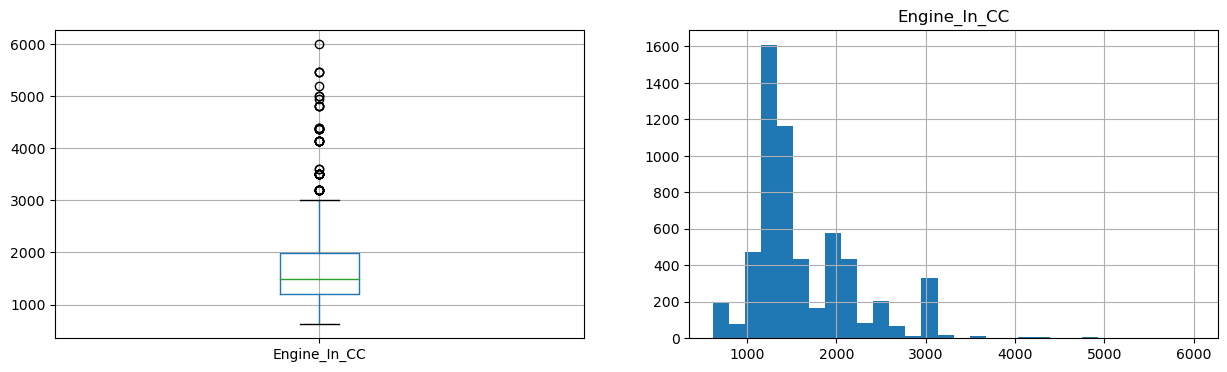

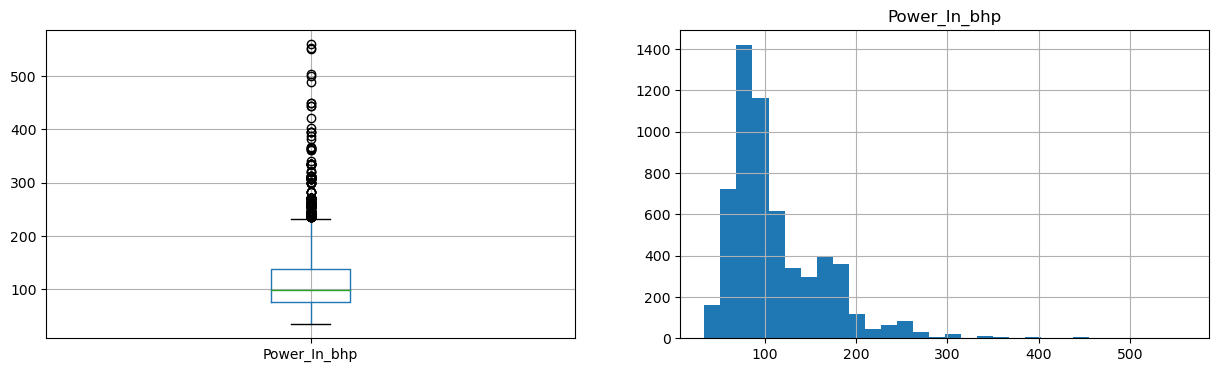

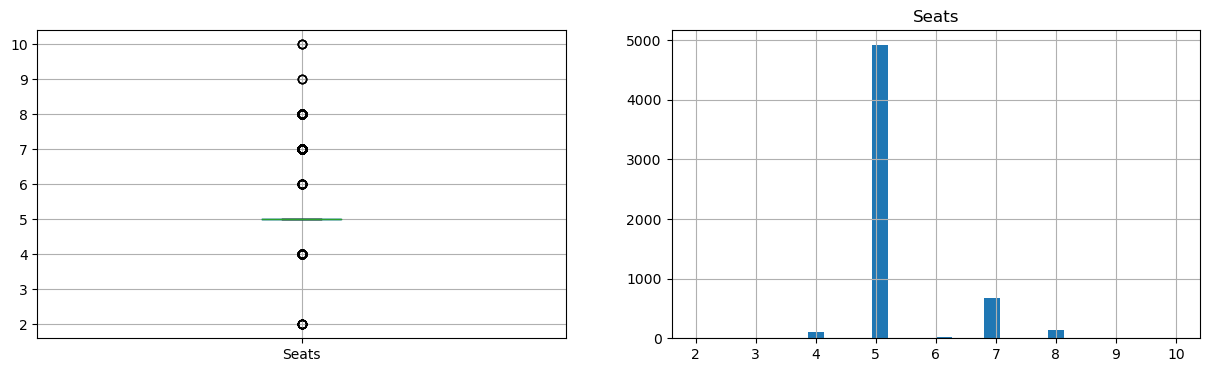

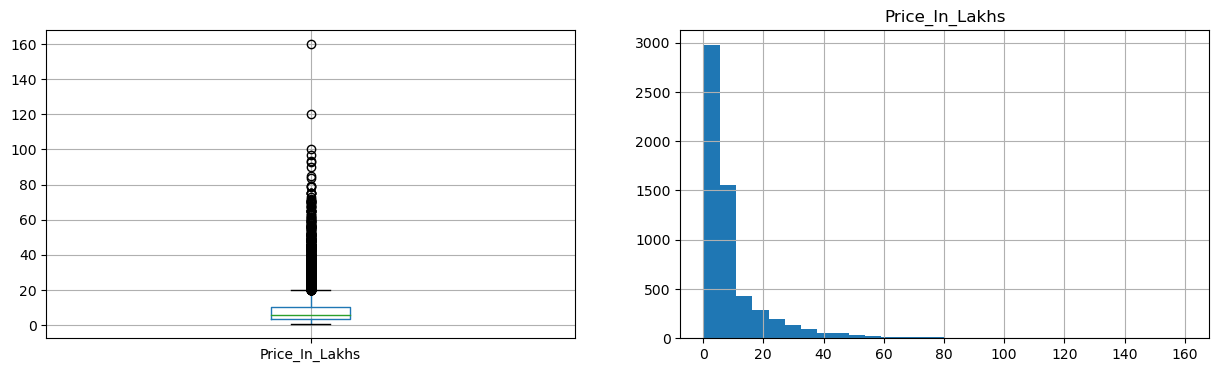

In [26]:
def plot_data(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(15, 4))
        
        # Boxplot
        plt.subplot(1, 2, 1)
        df.boxplot([column])
        
        # Histogram
        plt.subplot(1, 2, 2)
        df[column].hist(bins=30)
        plt.title(column)
        
        plt.show()

plot_data(used_cars)

#### Remove Outliers

In [27]:
for col in ['Kilometers_Driven','Mileage_in_kmpl','Engine_In_CC','Power_In_bhp','Price_In_Lakhs']:
    Q1 = used_cars[col].quantile(0.25)
    Q3 = used_cars[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    used_cars = used_cars[(used_cars[col] >= lower_bound) & (used_cars[col] <= upper_bound)]

In [28]:
used_cars.describe()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs
count,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000,5253.000000
mean,2013.344184,56685.757472,18.667788,1534.462783,103.566436,5.281553,6.894788
std,3.156182,30333.030888,4.044854,500.672616,39.715186,0.772059,5.134957
min,1998.000000,171.000000,8.700000,624.000000,34.200000,4.000000,0.440000
25%,2011.000000,35000.000000,16.000000,1197.000000,74.000000,5.000000,3.460000
50%,2014.000000,54000.000000,18.600000,1399.000000,88.800000,5.000000,5.400000
75%,2016.000000,73000.000000,21.400000,1798.000000,121.300000,5.000000,8.260000
max,2019.000000,169006.000000,33.780000,3498.000000,282.000000,10.000000,25.640000


In [29]:
used_cars.shape

(5253, 13)

In [30]:
used_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs,Company
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan


## Column Name

In [31]:
used_cars['Name'].unique()

array(['Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V',
       'Maruti Ertiga VDI', ...,
       'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [32]:
used_cars['Name'].nunique()

1621

In [33]:
used_cars['Name'].value_counts()

Mahindra XUV500 W8 2WD            49
Maruti Swift VDI                  45
Maruti Swift Dzire VDI            33
Honda City 1.5 S MT               33
Hyundai i10 Sportz                30
                                  ..
Ford EcoSport 1.5 Petrol Trend     1
Volvo XC90 2007-2015 D5 AWD        1
Mahindra Scorpio S2 7 Seater       1
Skoda Rapid Leisure 1.6 TDI MT     1
Mahindra Xylo D4 BSIV              1
Name: Name, Length: 1621, dtype: int64

#### Count Plot

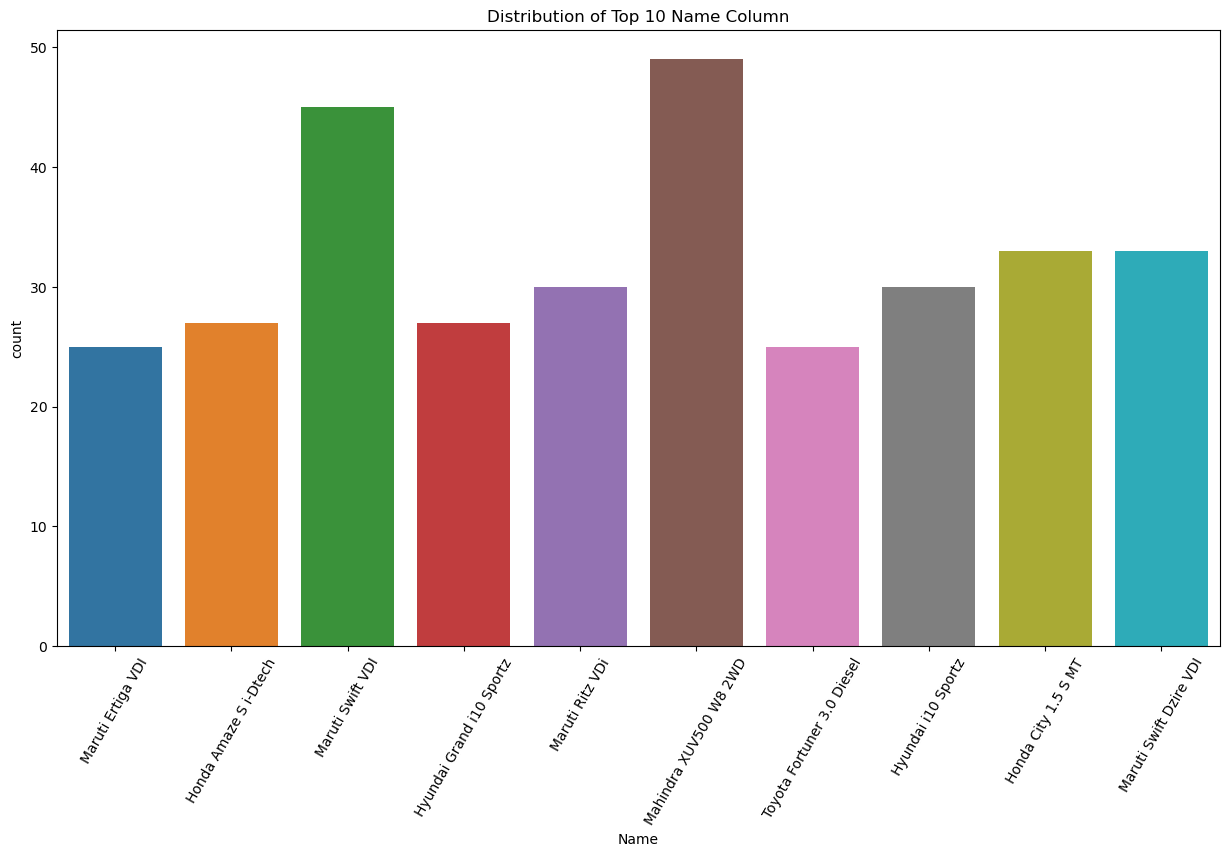

In [34]:
# Get top 10 categories
top_categories = used_cars['Name'].value_counts().index[:10]

# Filter data
filtered_data = used_cars[used_cars['Name'].isin(top_categories)]

# Plot
plt.figure(figsize=(15,8))
sns.countplot(data=filtered_data, x='Name')
plt.xticks(rotation=60)
plt.title('Distribution of Top 10 Name Column')
plt.show()

## Column Company

In [35]:
used_cars['Company'].unique()

array(['Hyundai', 'Honda', 'Maruti', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Mitsubishi', 'Renault', 'BMW', 'Mahindra',
       'Ford', 'Mercedes-Benz', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet',
       'Skoda', 'Mini', 'Fiat', 'Jeep', 'Land', 'Ambassador', 'Isuzu',
       'ISUZU', 'Force'], dtype=object)

In [36]:
used_cars['Company'].nunique()

27

In [37]:
used_cars['Company'].value_counts()

Maruti           1131
Hyundai          1042
Honda             597
Toyota            355
Volkswagen        311
Ford              269
Mahindra          263
Tata              176
Mercedes-Benz     168
Skoda             164
BMW               147
Renault           145
Audi              144
Chevrolet         119
Nissan             89
Mitsubishi         23
Fiat               22
Volvo              19
Mini               15
Jeep               15
Datsun             13
Land               12
Jaguar              7
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Name: Company, dtype: int64

#### Count Plot

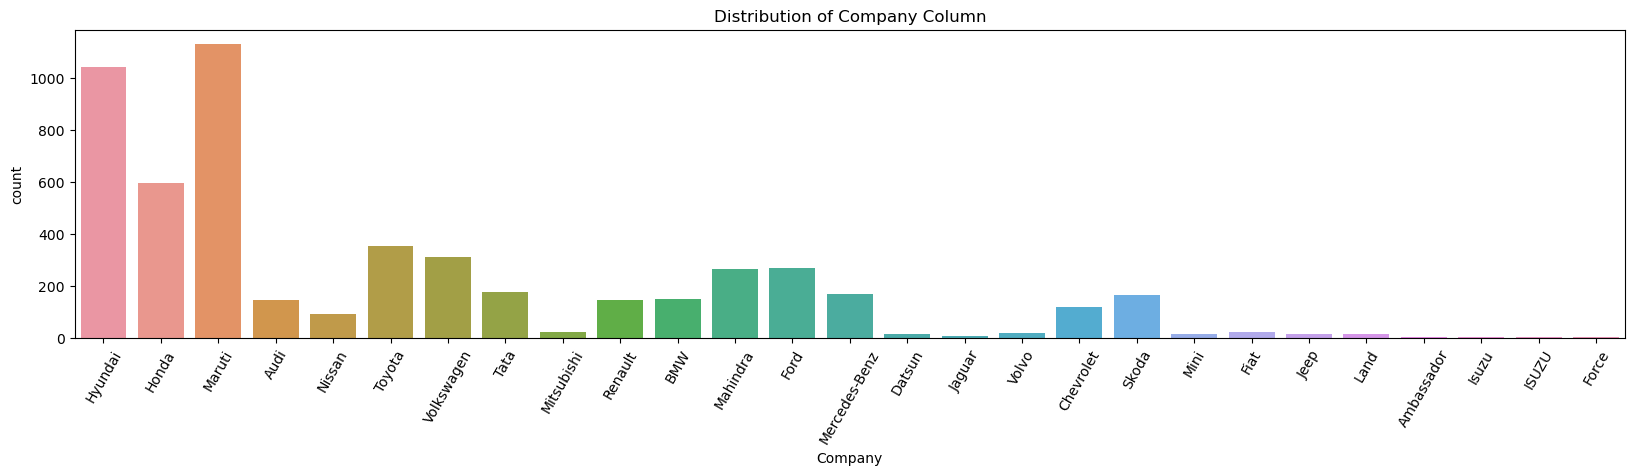

In [38]:
plt.figure(figsize=(20,4))
sns.countplot(used_cars,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

## Location

In [39]:
used_cars['Location'].unique()

array(['Pune', 'Chennai', 'Coimbatore', 'Jaipur', 'Mumbai', 'Kochi',
       'Kolkata', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad'],
      dtype=object)

In [40]:
used_cars['Location'].nunique()

11

In [41]:
used_cars['Location'].value_counts()

Mumbai        704
Hyderabad     640
Kochi         570
Pune          543
Coimbatore    505
Kolkata       504
Delhi         486
Chennai       421
Jaipur        385
Bangalore     286
Ahmedabad     209
Name: Location, dtype: int64

#### Count Plot

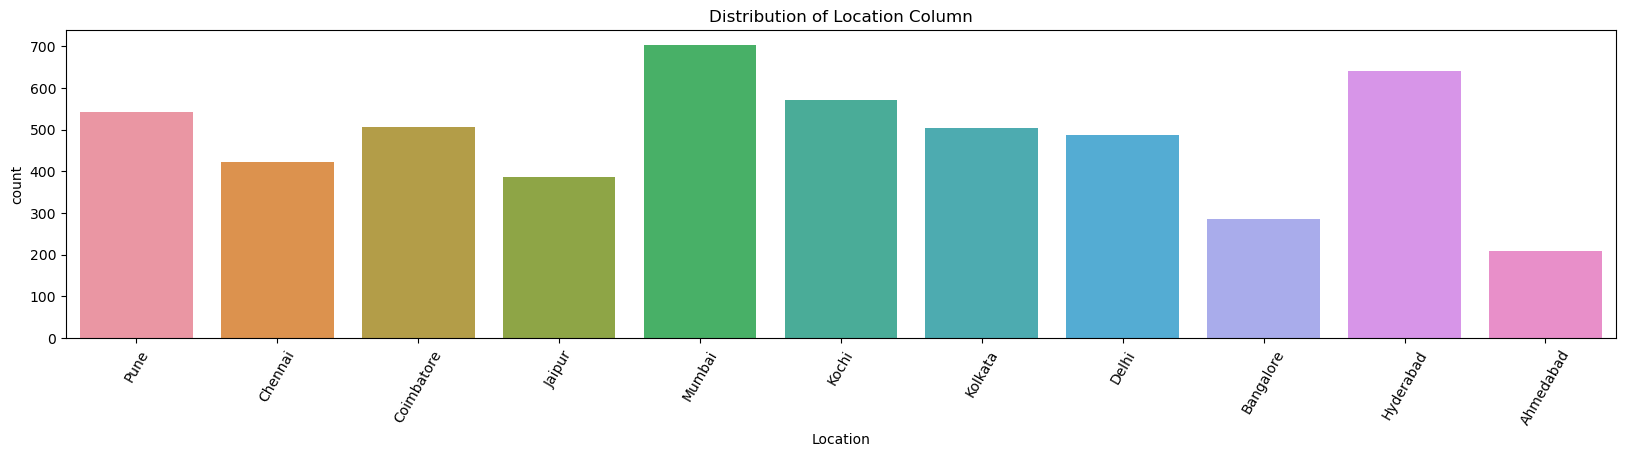

In [42]:
plt.figure(figsize=(20,4))
sns.countplot(used_cars,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Location Column');

## Fuel_Type

In [43]:
used_cars['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [44]:
used_cars['Fuel_Type'].nunique()

4

In [45]:
used_cars['Fuel_Type'].value_counts()

Diesel    2664
Petrol    2572
CNG         11
LPG          6
Name: Fuel_Type, dtype: int64

#### Count Plot

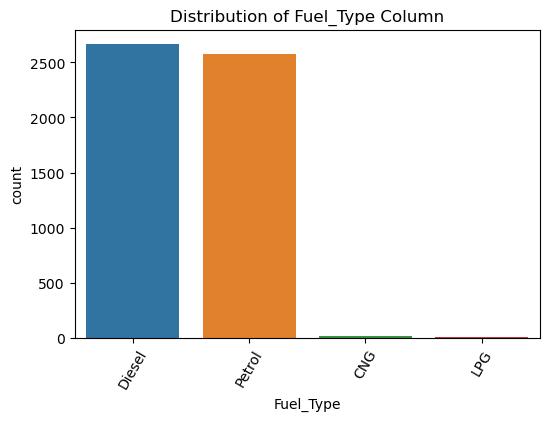

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(used_cars,x='Fuel_Type');
plt.xticks(rotation=60)
plt.title('Distribution of Fuel_Type Column');

## Transmission

In [47]:
used_cars['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
used_cars['Transmission'].nunique()

2

In [49]:
used_cars['Transmission'].value_counts()

Manual       4051
Automatic    1202
Name: Transmission, dtype: int64

#### Count Plot

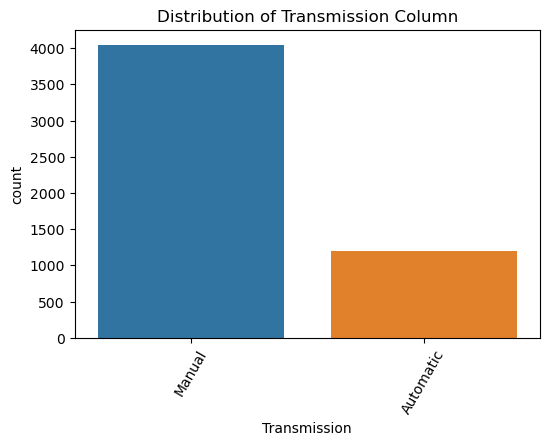

In [50]:
plt.figure(figsize=(6,4))
sns.countplot(used_cars,x='Transmission');
plt.xticks(rotation=60)
plt.title('Distribution of Transmission Column');

## Owner_Type

In [51]:
used_cars['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [52]:
used_cars['Owner_Type'].nunique()

4

In [53]:
used_cars['Owner_Type'].value_counts()

First             4312
Second             843
Third               93
Fourth & Above       5
Name: Owner_Type, dtype: int64

#### Count Plot

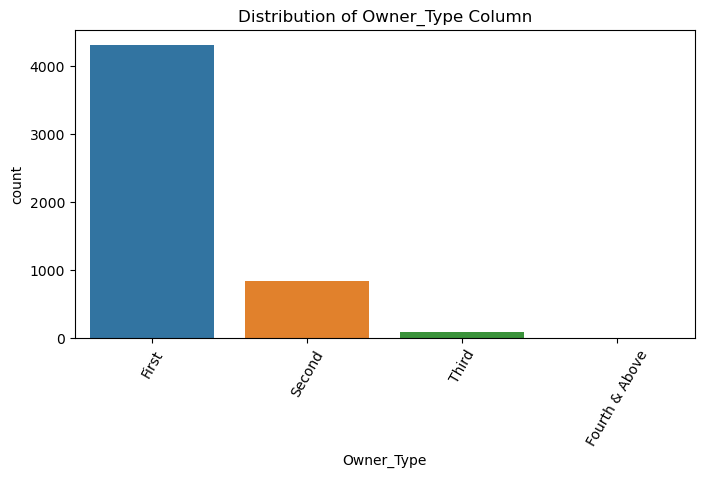

In [54]:
plt.figure(figsize=(8,4))
sns.countplot(used_cars,x='Owner_Type');
plt.xticks(rotation=60)
plt.title('Distribution of Owner_Type Column');

## Company vs mean Price_In_Lakhs

In [55]:
top_ten_expensive_company = used_cars.groupby("Company")["Price_In_Lakhs"].mean().sort_values(ascending=False).reset_index().head(10)
top_ten_expensive_company

,Company,Price_In_Lakhs
0,Mini,22.228000
1,Jaguar,20.610000
2,Isuzu,20.000000
3,Jeep,18.718667
4,Land,18.702500
5,Volvo,18.440000
6,Audi,18.190625
7,Mercedes-Benz,15.815000
8,BMW,15.449116
9,ISUZU,12.045000


#### Bar plot

<Axes: xlabel='Company', ylabel='Price_In_Lakhs'>

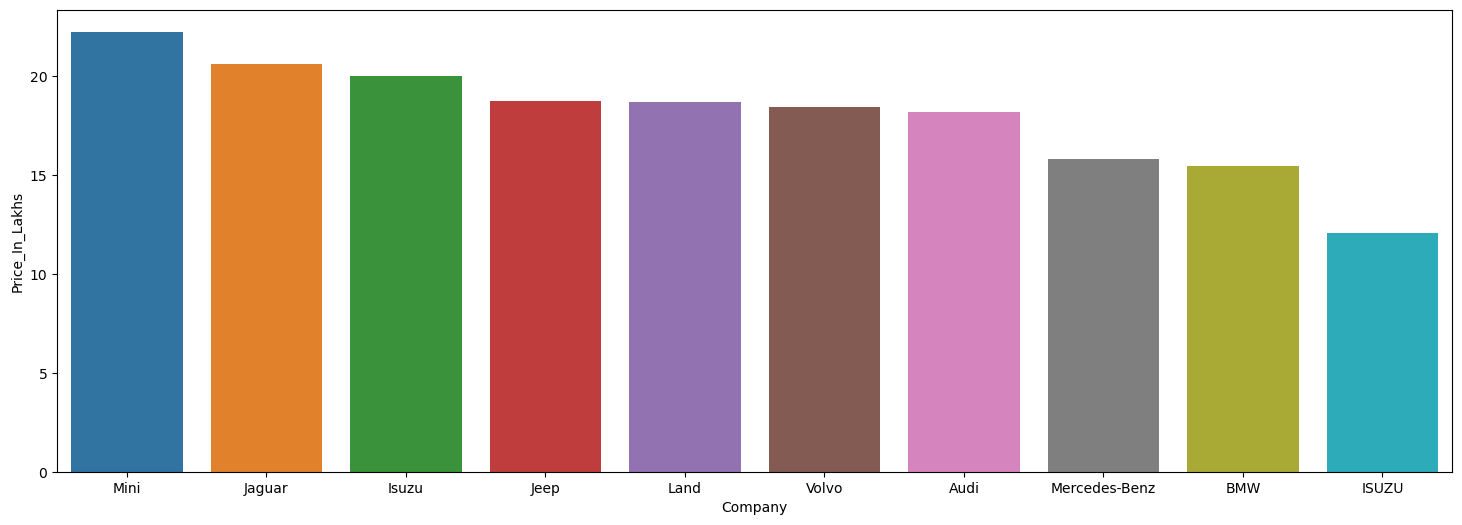

In [56]:
plt.figure(figsize=(18,6))
sns.barplot(x="Company",y="Price_In_Lakhs",data=top_ten_expensive_company)

## Location vs mean Price_In_Lakhs

In [57]:
# Calculate mean price for each location
mean_price = used_cars.groupby('Location')['Price_In_Lakhs'].mean()

#### Barplot

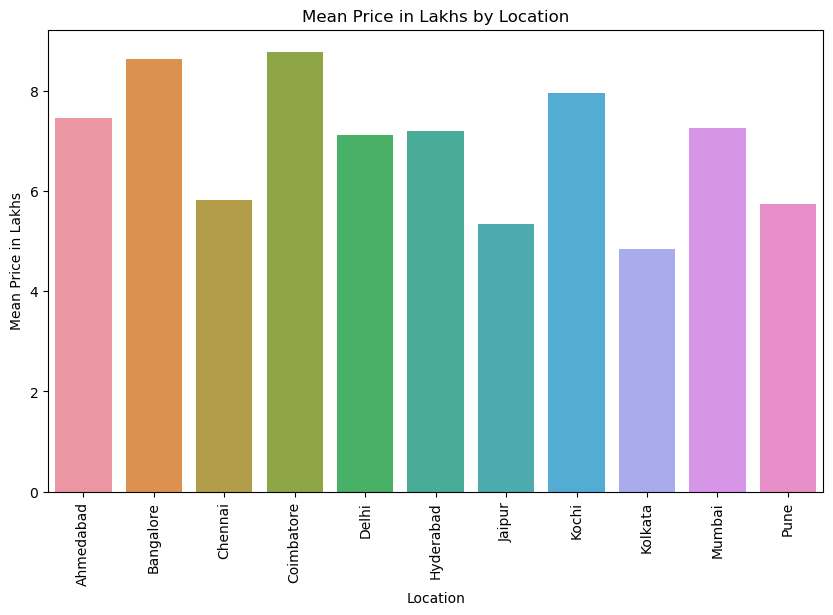

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=mean_price.index, y=mean_price.values)
plt.xlabel('Location')
plt.ylabel('Mean Price in Lakhs')
plt.title('Mean Price in Lakhs by Location')
plt.xticks(rotation=90)
plt.show()

## Year vs mean Price_In_Lakhs

In [59]:
# Calculate mean price for each location
year_mean_price = used_cars.groupby('Year')['Price_In_Lakhs'].mean()

#### Barplot

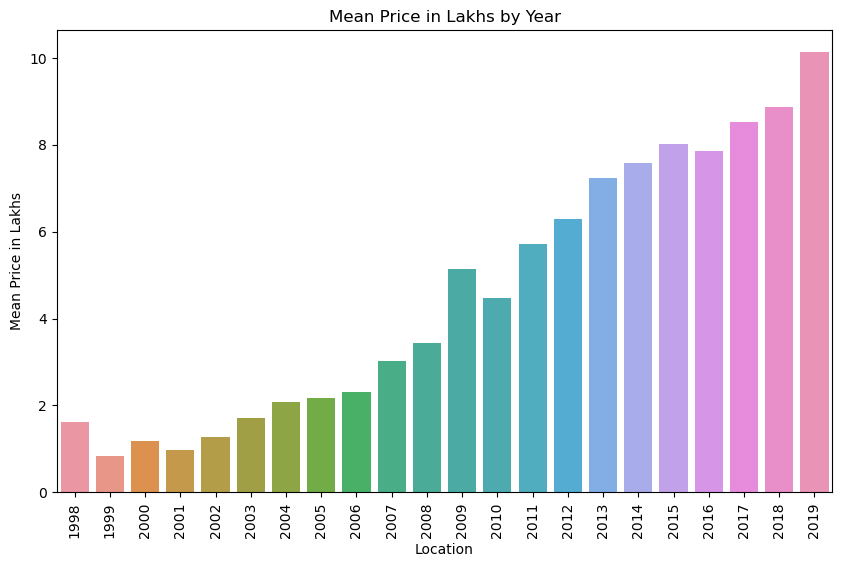

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=year_mean_price.index, y=year_mean_price.values)
plt.xlabel('Location')
plt.ylabel('Mean Price in Lakhs')
plt.title('Mean Price in Lakhs by Year')
plt.xticks(rotation=90)
plt.show()

## Owner_Type vs mean Price_In_Lakhs

In [61]:
owner_mean_price = used_cars.groupby('Owner_Type')['Price_In_Lakhs'].mean()

#### Pie chart

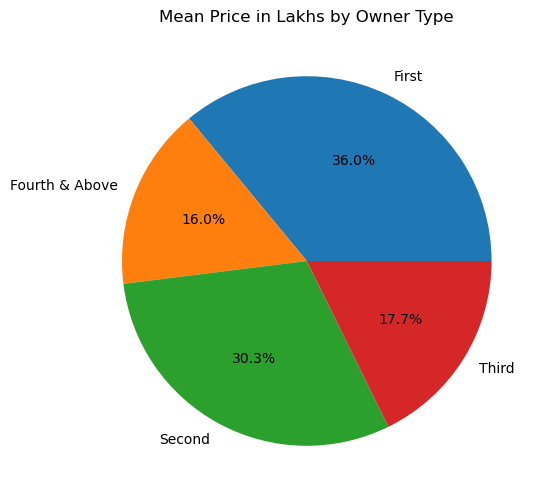

In [62]:
plt.figure(figsize=(10,6))
plt.pie(owner_mean_price.values, labels=owner_mean_price.index, autopct='%1.1f%%')
plt.title('Mean Price in Lakhs by Owner Type')
plt.show()

## Fuel_Type vs mean Price_In_Lakhs

In [63]:
fuel_mean_price = used_cars.groupby('Fuel_Type')['Price_In_Lakhs'].mean()

#### Pie chart

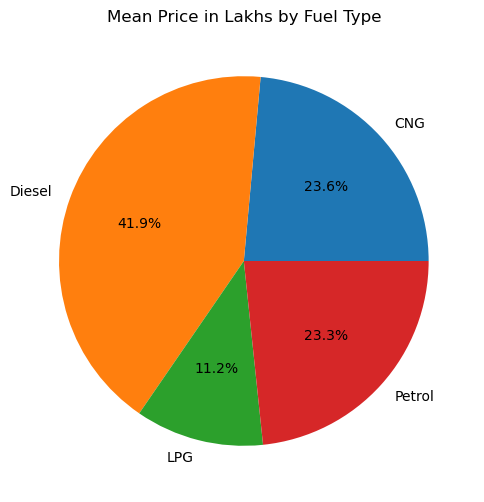

In [64]:
plt.figure(figsize=(10,6))
plt.pie(fuel_mean_price.values, labels=fuel_mean_price.index, autopct='%1.1f%%')
plt.title('Mean Price in Lakhs by Fuel Type')
plt.show()

## Transmission vs mean Price_In_Lakhs

In [65]:
transmission_mean_price = used_cars.groupby('Transmission')['Price_In_Lakhs'].mean()

#### Pie chart

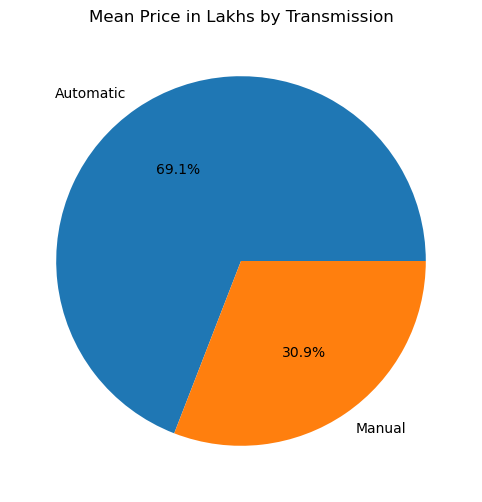

In [66]:
plt.figure(figsize=(10,6))
plt.pie(transmission_mean_price.values, labels=transmission_mean_price.index, autopct='%1.1f%%')
plt.title('Mean Price in Lakhs by Transmission')
plt.show()

## Mileage_in_kmpl vs Price_In_Lakhs

#### Scatter plot

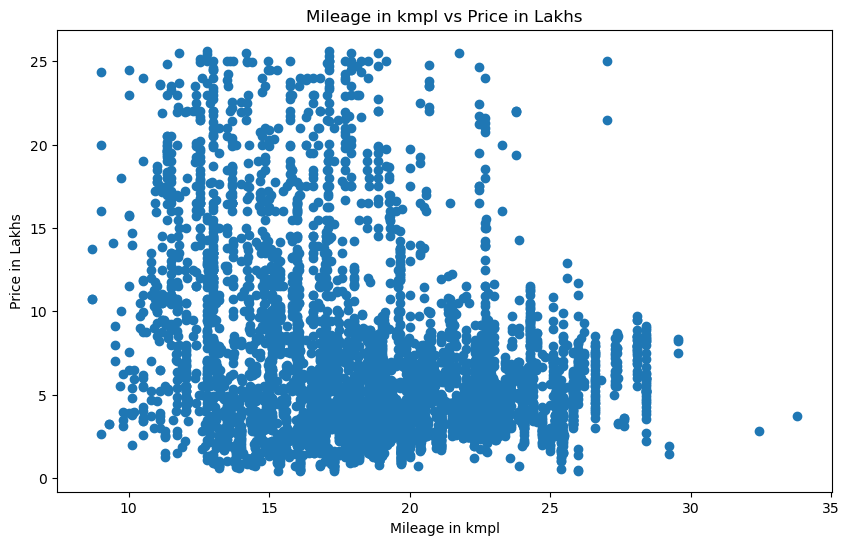

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(used_cars['Mileage_in_kmpl'], used_cars['Price_In_Lakhs'])
plt.xlabel('Mileage in kmpl')
plt.ylabel('Price in Lakhs')
plt.title('Mileage in kmpl vs Price in Lakhs')
plt.show()

## Engine_In_CC vs Price_In_Lakhs

#### Scatter plot

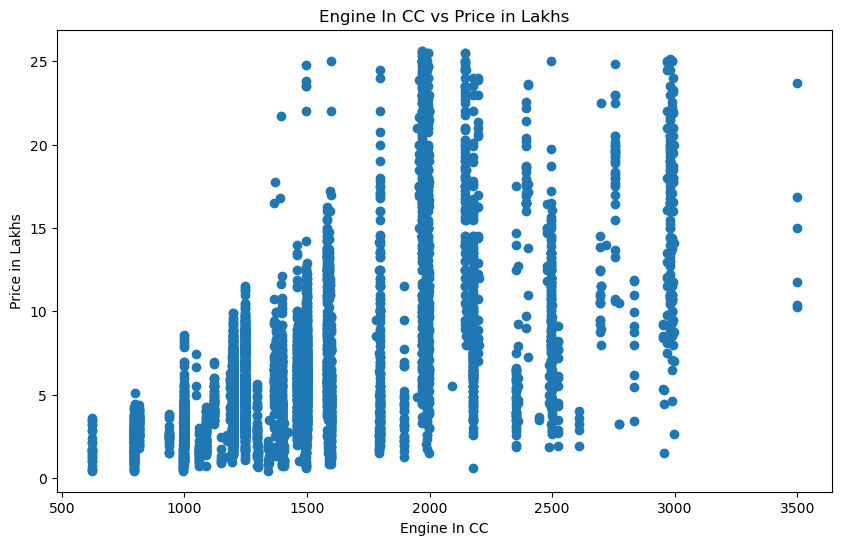

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(used_cars['Engine_In_CC'], used_cars['Price_In_Lakhs'])
plt.xlabel('Engine In CC')
plt.ylabel('Price in Lakhs')
plt.title('Engine In CC vs Price in Lakhs')
plt.show()

## Kilometers_Driven vs Price_In_Lakhs

#### Scatter plot

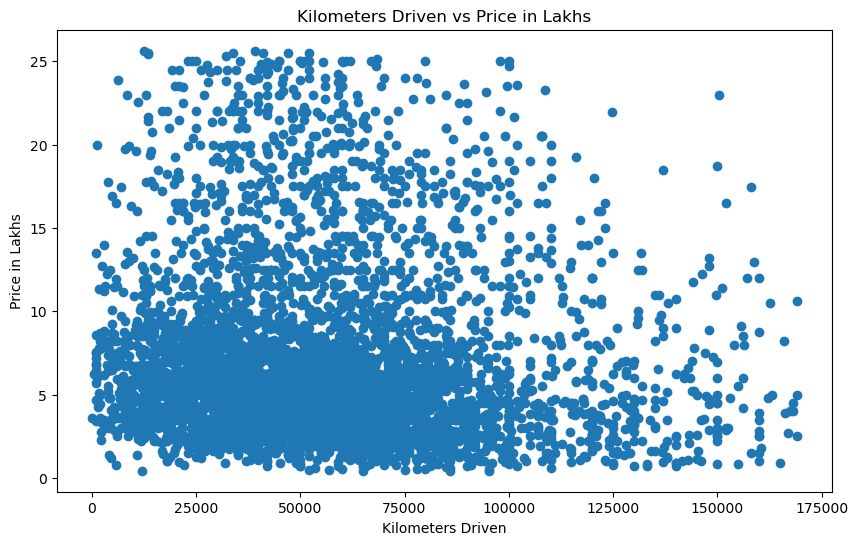

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(used_cars['Kilometers_Driven'], used_cars['Price_In_Lakhs'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Price in Lakhs')
plt.title('Kilometers Driven vs Price in Lakhs')
plt.show()

## Correlation Matrix

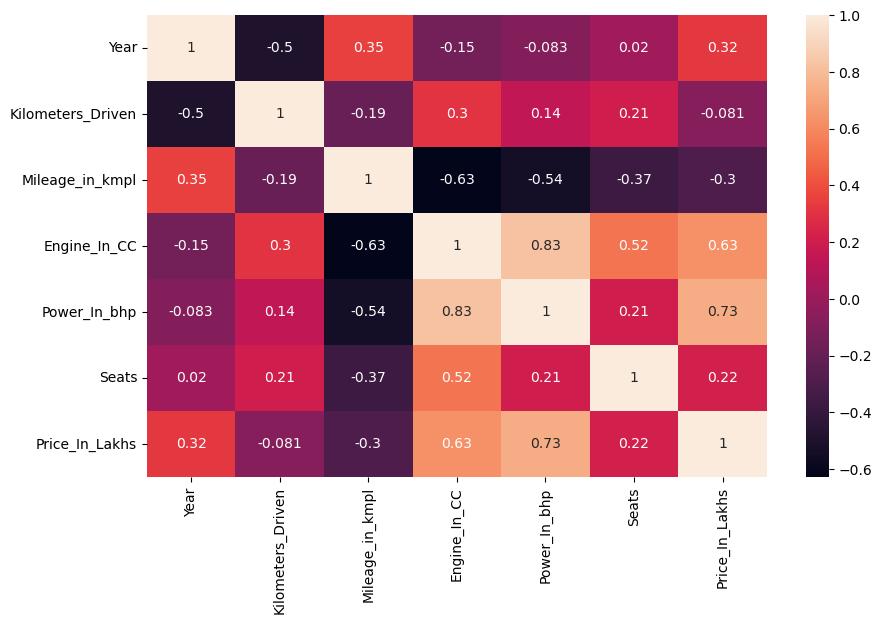

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(used_cars.corr(),annot=True);

## Pairplot

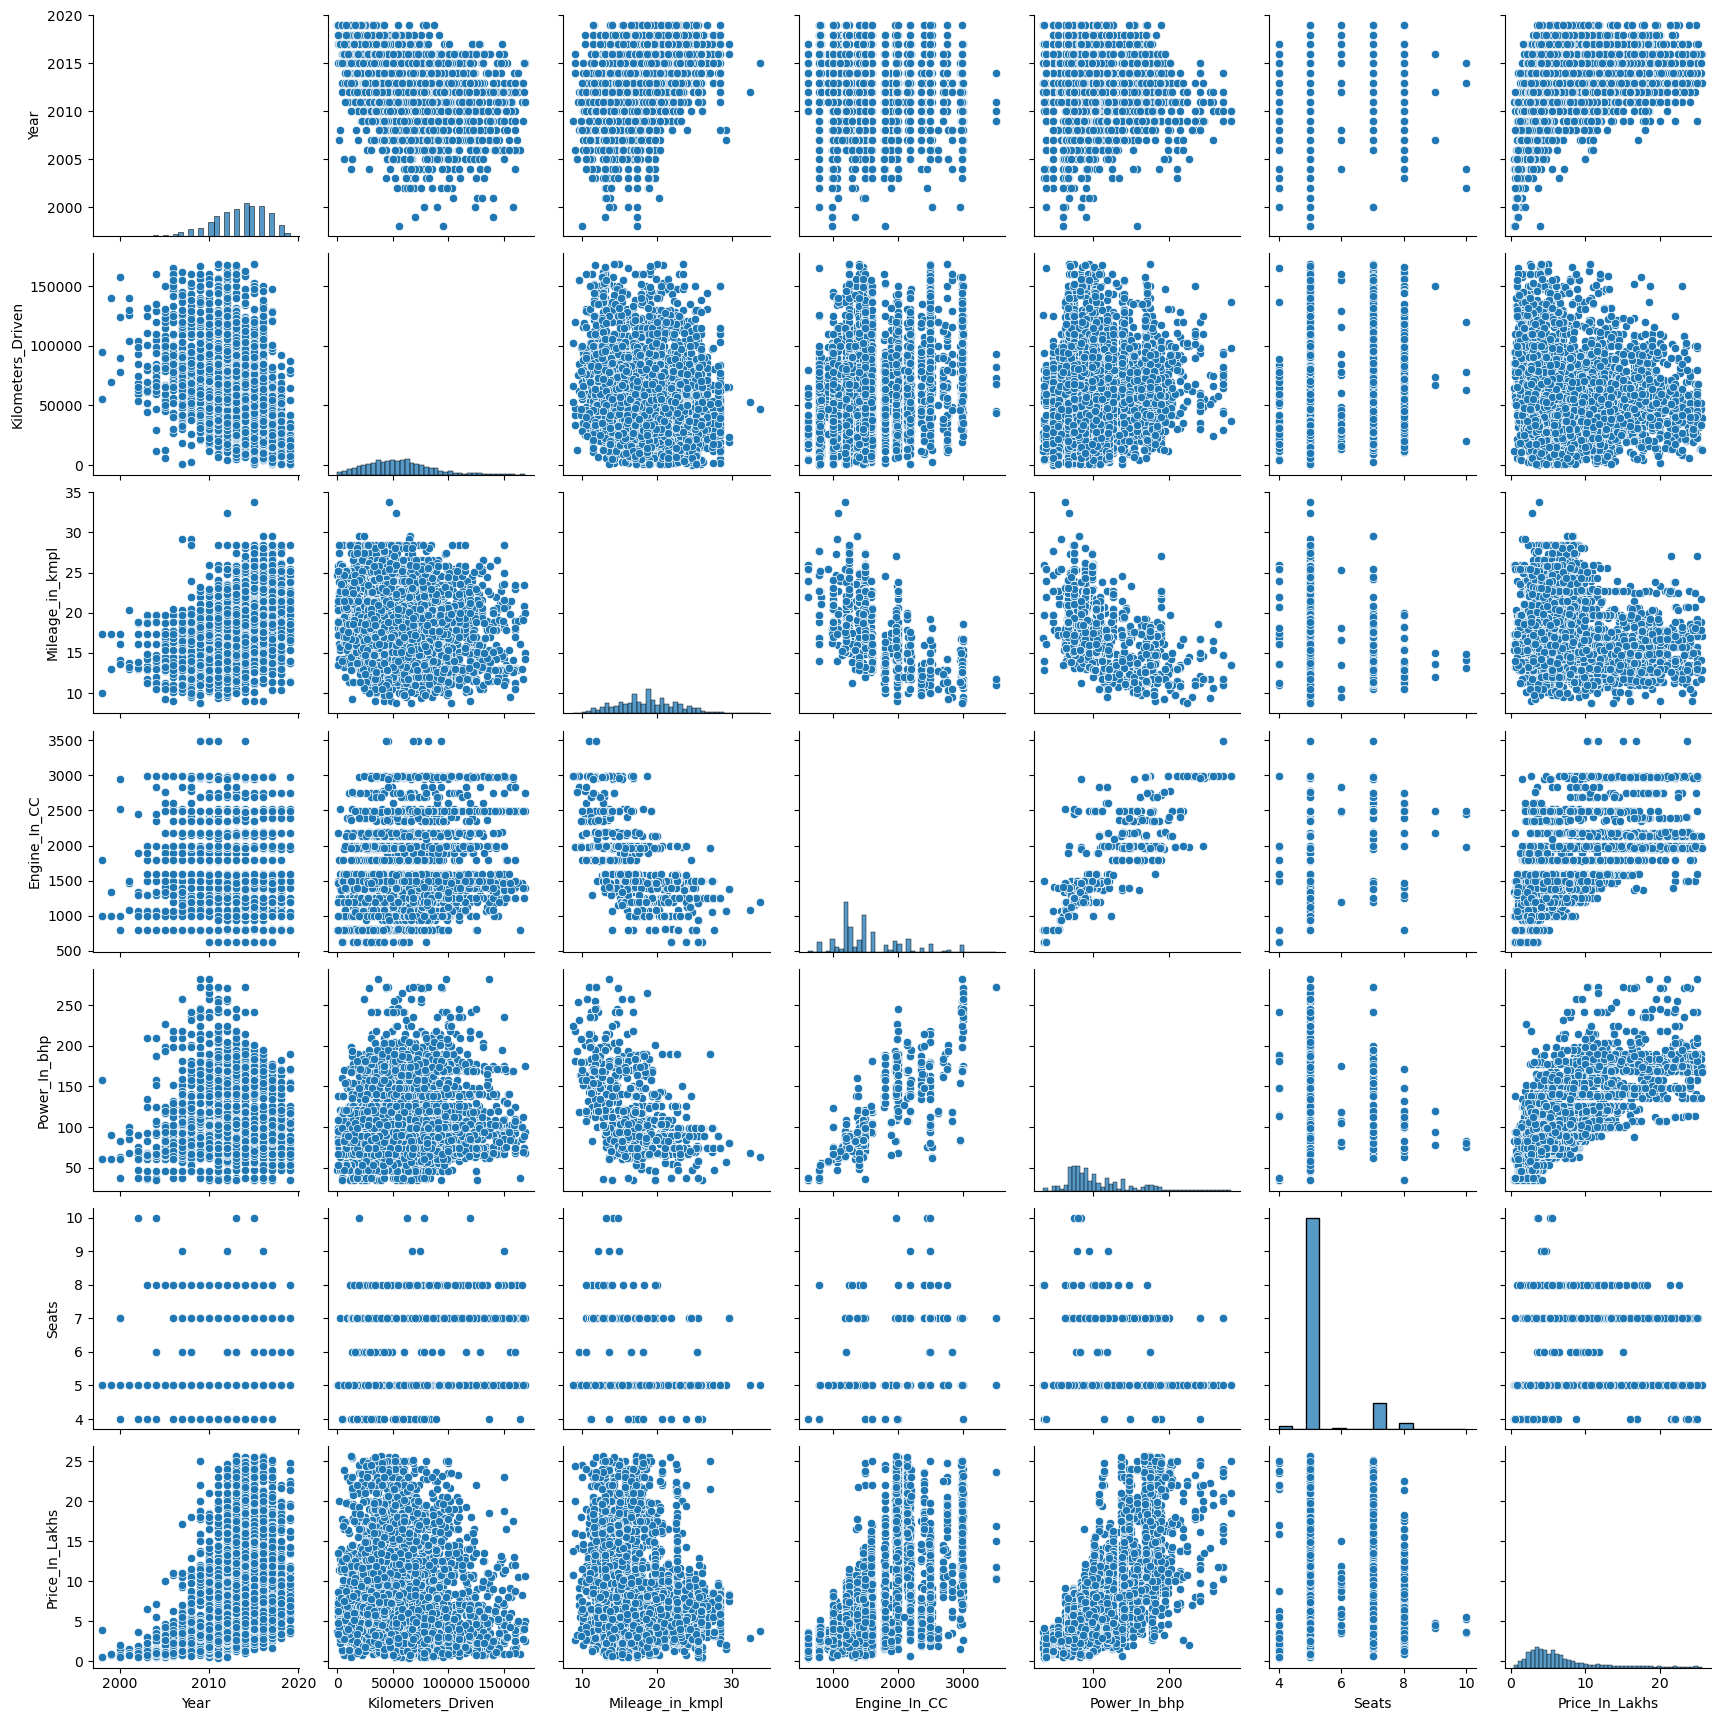

In [71]:
sns.pairplot(used_cars)
plt.show()

# Modeling Technique
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression

In [72]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
models = {
        "Multiple Linear Regression": LinearRegression(),
        "Decision Tree ": DecisionTreeRegressor(),
        "Random Forest ": RandomForestRegressor(),
    }

### One Hot Encoding

In [74]:
# List of categorical columns to apply one-hot encoding
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Company']

# Apply one-hot encoding
used_cars_encoded = pd.get_dummies(used_cars, columns=categorical_columns)

# Print the DataFrame to check the result
used_cars_encoded.head()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_In_CC,Power_In_bhp,Seats,Price_In_Lakhs,Name_Ambassador Classic Nova Diesel,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,...,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2013,86999,23.08,1461.0,63.10,5.0,3.50,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [75]:
used_cars_encoded.shape

(5253, 1676)

### 1. Split input and target

In [76]:
X = used_cars_encoded.drop(['Price_In_Lakhs'], axis=1) #input
y = used_cars_encoded['Price_In_Lakhs'] # target

### 2. Splitting the data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Creating models ,training the models, Making predictions and Calculating evaluation metrics

In [78]:
def apply_models(X_train, y_train, X_test, y_test):
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Print RMSE
        print(f"{name}")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R-Squared: {r2}")
        print('\n')

    return models  # Returns the dictionary of trained models



In [79]:
models = apply_models(X_train, y_train, X_test, y_test)

Multiple Linear Regression
MAE: 1.2224215073036475
MSE: 4.069287337109441
RMSE: 2.0172474655107244
R-Squared: 0.8696270873014531


Decision Tree 
MAE: 1.205846812559467
MSE: 4.331631993339676
RMSE: 2.0812573106993946
R-Squared: 0.8612220192563123


Random Forest 
MAE: 0.9305342655520821
MSE: 2.399354687524322
RMSE: 1.5489850507749654
R-Squared: 0.9231288347822452




I evaluated three different models: Multiple Linear Regression, Decision Tree, and Random Forest. The performance of the models was assessed using four metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-Squared.

- Multiple Linear Regression yielded an MAE of 1.22, an MSE of 4.07, an RMSE of 2.02, and an R-Squared of 0.87.
- Decision Tree resulted in an MAE of 1.24, an MSE of 4.52, an RMSE of 2.13, and an R-Squared of 0.86.
- Random Forest produced the best results with an MAE of 0.93, an MSE of 2.43, an RMSE of 1.56, and the highest R-Squared value of 0.92.
Based on these results, the Random Forest model performed the best in terms of all four metrics.

The Random Forest model has been trained and evaluated using several metrics:

Mean Absolute Error (MAE): The MAE of model is 0.93. This means that on average, this model’s predictions are approximately 0.943units away from the actual values. This is a relatively low error, suggesting that the model is doing a good job of predicting the target variable.

Mean Squared Error (MSE): The MSE of model is 2.43. This metric is more sensitive to large errors than the MAE because it squares the differences before averaging them. A lower MSE means a better fit to the data.

Root Mean Squared Error (RMSE): The RMSE of model is 1.56. Like MSE, RMSE is sensitive to large errors but it has the same units as the output variable, making it more interpretable than MSE. A lower RMSE indicates a better fit to the data.

R-Squared: The R-Squared of model is 0.92 (or 92% when expressed as a percentage). This means that approximately 92% of the variation in the target variable can be explained by my model’s predictors. An R-Squared of 92% is quite high, indicating that my model explains a large portion of the variance in the target variable.

In conclusion, these metrics suggest that the Random Forest model has performed well on my training data. It’s making close predictions (as indicated by the low MAE, MSE, and RMSE) and it’s able to explain a large portion of the variance in my target variable (as indicated by the high R-Squared value).

---

#### Barplot for comparing models of R-squared values

In [80]:
def compare_models(models, X_test, y_test):
    rsquared_values = []
    model_names = []

    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        r2 = r2_score(y_test, y_pred)

        # Append RMSE value and model name to respective lists
        rsquared_values.append(r2)
        model_names.append(name)

    # Define a list of colors
    colors = ['b', 'g', 'r', 'c', 'm']

    # Create bar plot with different colors
    bars = plt.bar(model_names, rsquared_values, color=colors)
    plt.xlabel('Models')
    plt.ylabel('R-Squared')
    plt.title('Comparison of R-Squared values for all models')
    plt.xticks(rotation=90)

    # Add a legend
    plt.legend(bars, model_names)

    plt.show()




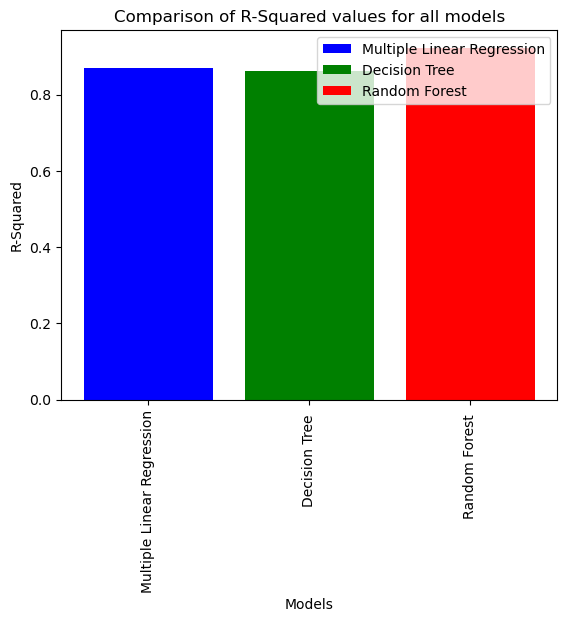

In [81]:
# Call the function with the trained models and test data
compare_models(models, X_test, y_test)

### 4. Plotting predicted vs. actual values

In [82]:
def plot_predictions(models, X_test, y_test):
    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test)

        # Plot predicted vs. actual values
        plt.scatter(y_test, y_pred, label='Actual vs. Predicted')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title(f"{name}: Actual Prices vs. Predicted Prices")
        plt.legend()
        plt.show()


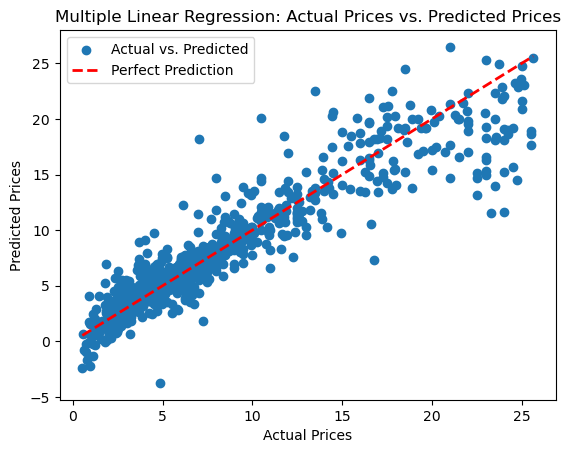

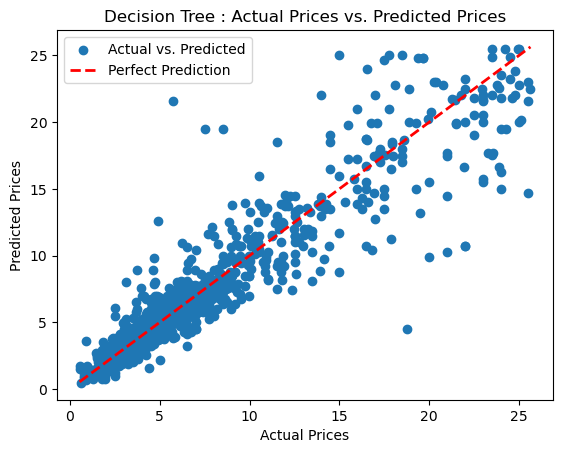

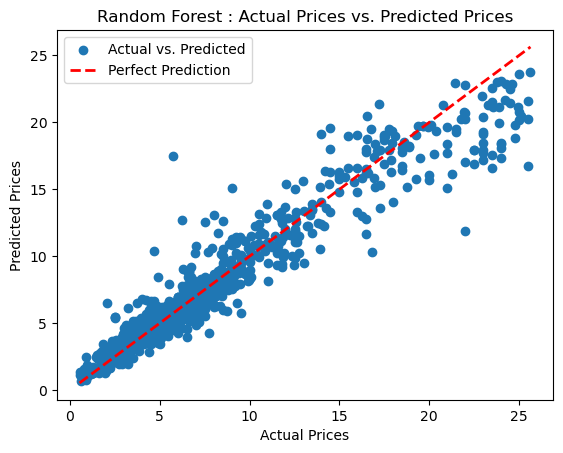

In [83]:
plot_predictions(models, X_test, y_test)

- Below the red line, it means my model’s prediction is less than the actual price. So, it’s underestimating the price.
- Above the red line, it means my model’s prediction is more than the actual price. So, it’s overestimating the price


---
# Conclusion
- The Random Forest Regression model has performed the best in terms of all three metrics: it has the lowest MAE and MSE, and the highest R-Squared. This suggests that this model has made the most accurate predictions compared to the other models.
- The Multiple Linear Regression and Decision Tree Regression models have performed reasonably well, with R-Squared values above 0.8, but they have not performed as well as the Random Forest Regression model.

# Recommendation

Given the results of my analysis,
- I recommend using the Random Forest model for predicting used car prices in India due to its superior performance across all evaluation metrics.
- I suggest focusing on the most influential features identified by the model when pricing used cars. This will ensure that the pricing is fair and reflective of the car’s value.
- Continuous monitoring and evaluation of the model’s performance should be conducted to ensure its accuracy over time. If necessary, the model should be retrained with new data to maintain its predictive power.
- I recommend exploring other machine learning models or ensemble methods to potentially improve prediction accuracy further.